# Lifecycle of a data-analysis

         
## Wrangle
![](https://raw.githubusercontent.com/dereklhansen/stats306_lab/master/lab10/diagrams/data-science-wrangle.png)

-  **Import:** Download the data you will be using, along with any materials such as data dictionaries.
    -  Keep it in a folder called ```input/``` which is only read and never modified.
    -  For your project, we handle most of this for you, but you should do some groundowrk to figure out where the data come from.
-  **Tidy:** Manipulate the data so it is tabular and has a coherent structure (c.f. R4DS Ch. 12). 
-  **Transform:** Filter, select, and join different datasets in the right form for a particular visual and/or model.

**Exercise**: What is the difference between **tidying** and **transforming**?

**Answer**: 
-  Tidying data does not add or destroy information. The goal is to get data into tibbles that are amenable to data analysis. Data should be tidied once in the beginning of a data analysis, and it should be done independently of your particular research question.
-  Transforming data is done once you have a particular question in mind. You may remove irrelevant columns and rows in this step, join together tables that have variables of interest, and create new variables of interest

-  In general, functions related to "tidying" data are in the "tidyr" package, and functions related to "transforming" data are in the dplyr package. However, there are cases where you will use dplyr functions when tidying and tidyr functions when transforming

   
## Exploratory Data Anaylsis

![](https://raw.githubusercontent.com/dereklhansen/stats306_lab/master/lab10/diagrams/data-science-explore.png)


- Exploratory Data Analysis (EDA) is the process of generating questions, investigating them, and using what we learn to refine questions or ask new ones

- In the beginning, the goal is to ask a large number of questions and narrow it down as we learn more about our data.

- There isn't a one-size-fits-all solution. EDA requires a bit of creativity and confidence to explore.

![](https://raw.githubusercontent.com/dereklhansen/stats306_lab/master/lab10/diagrams/data-science.png)


-  **Transform:** Filter, select, and join different datasets in the right form for a particular visual and/or model.
-  **Visualize:** See relationships in the transformed dataset and decide if it's worth modelling
- **Model:** Run a statistical model on the data to perform inference and confirmatory analysis

## Basic Questions
-  While every dataset is different, basic questions about data come in two forms (R4DS):
1.  What type of **variation** occurs within my variables?
2.  What type of **covariation** occurs between my two variables?

- These guiding principles can keep you on track, but won't be too useful on their own.


## Communicate

![](https://raw.githubusercontent.com/dereklhansen/stats306_lab/master/lab10/diagrams/data-science-communicate.png)

- **Communicate:** Publish the successful Transform-Visualize-Model cycles

# Final Project

In [3]:
## GO OVER PROJECT DESCRIPTION AND RUBRIC WITH CLASS AND ANSWER ANY QUESTIONS

-  Being aware of this process on your final project will help keep you organized and efficient
-  Moreover, the rubric will evaluate your ability to perform each of these steps.

# Example Response


Credit to Kaggle Expert wti 200's work "Exploratory Analysis -NYC Taxi Trip" and Derek's icpsr tidy files.

## 1. Introduction

https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [8]:
# Talk about the dataset, motivate Question 1 below

## 2. Package loading, import, and tidying

### Packages

In [57]:
# Load packages and explain their uses

In [2]:
suppressMessages({
    
knitr::opts_chunk$set(message=F)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(lubridate)
library(geosphere) # To calculate the spherical distance between pickup location and dropoff location
library(gridExtra) # To arrange two subplots together
library(Metrics) # To calculate MSE
    })

We use xxx package to ...

### Import

In [3]:
train = read_csv("train.csv")

Parsed with column specification:
cols(
  id = col_character(),
  vendor_id = col_double(),
  pickup_datetime = col_datetime(format = ""),
  dropoff_datetime = col_datetime(format = ""),
  passenger_count = col_double(),
  pickup_longitude = col_double(),
  pickup_latitude = col_double(),
  dropoff_longitude = col_double(),
  dropoff_latitude = col_double(),
  store_and_fwd_flag = col_character(),
  trip_duration = col_double()
)



### Tidy

Another good example are tidying ICPSR data, which has been demonstrated in Lab 8. 

In [41]:
###### Tidy the Taxi data ######

In [5]:
train_tidy = train %>% mutate(
    pickup_hour = hour(pickup_datetime),
    pickup_week = week(pickup_datetime),
    pickup_month = month(pickup_datetime),
    pickup_weekdays = weekdays(pickup_datetime),
    pickup_weekend = ifelse(pickup_weekdays==1 | pickup_weekdays==7,"Weekend","not-Weekend"),
    pickup_datetime:=as.Date(pickup_datetime),
    dropoff_datetime:=as.Date(dropoff_datetime),
    
)


## 3. Data Analysis

## Question 1: 

Describe the specific question and steps taken here.

### Example:
- To allocate taxis at different hour of a day, taxi company would like to explore among different pickup hours, the variation and correlation of trip distance, the speed and temporal variable using New York Taxi Trip Data.

In [6]:
###  Transformation : e.g. Calculate distance and speed
train_tidy = train_tidy %>% mutate(
    distance_km = distHaversine(matrix(c(pickup_longitude, pickup_latitude), ncol = 2),
                                 matrix(c(dropoff_longitude,dropoff_latitude), ncol = 2))/1000,
    trip_hour = trip_duration/3600,
    speed = (distance_km)/(trip_hour),
)

In [9]:
summary(train_tidy$speed)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.000    9.131   12.806   14.439   17.865 9285.227 

From the coordinates of the pickup and dropoff points we can calculate the distance between the two points. Then based on this, we could calculate the speed of the ride. There are certain rides with a speed of 9285km/h. But the average speed of 15km/h is reasonable. This will vary over the course of the day. Let's see check that too.

(Other transformations could be like remove extreme values, excluding specious trips etc.)

### - Visualization  (Explain every visual)

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



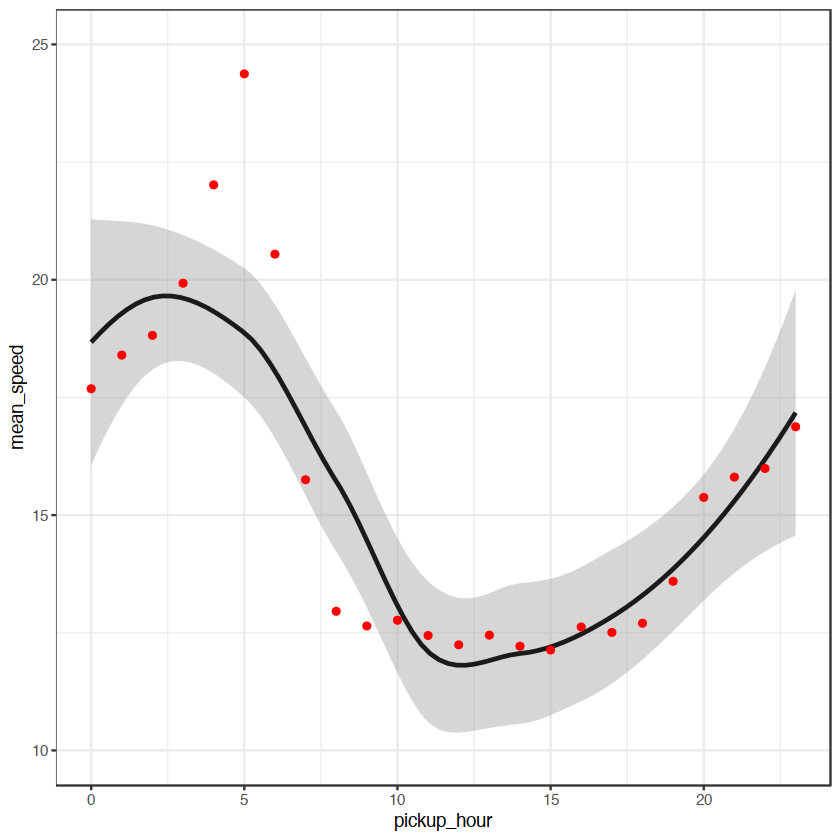

In [10]:
train_tidy %>% 
  group_by(pickup_hour) %>% 
  summarize(mean_speed = mean(speed),n()) %>% 
  ggplot(aes(x=pickup_hour,y=mean_speed))+
  geom_smooth(method = 'loess',color="grey10")+
  geom_point(color="red")+coord_cartesian(ylim=c(10,25))+theme_bw()

- Example Analysis Directions: 
    - At what pickup hour the speed reaches the minimum, and the maximum? And what might be the reasons behind it? Traffic Jam, should we allocate more taxis or less taxis?

    - The change pattern, increasing and decreasing of speed.
    
    - Some outliers at very early morning.
    
    - ...

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



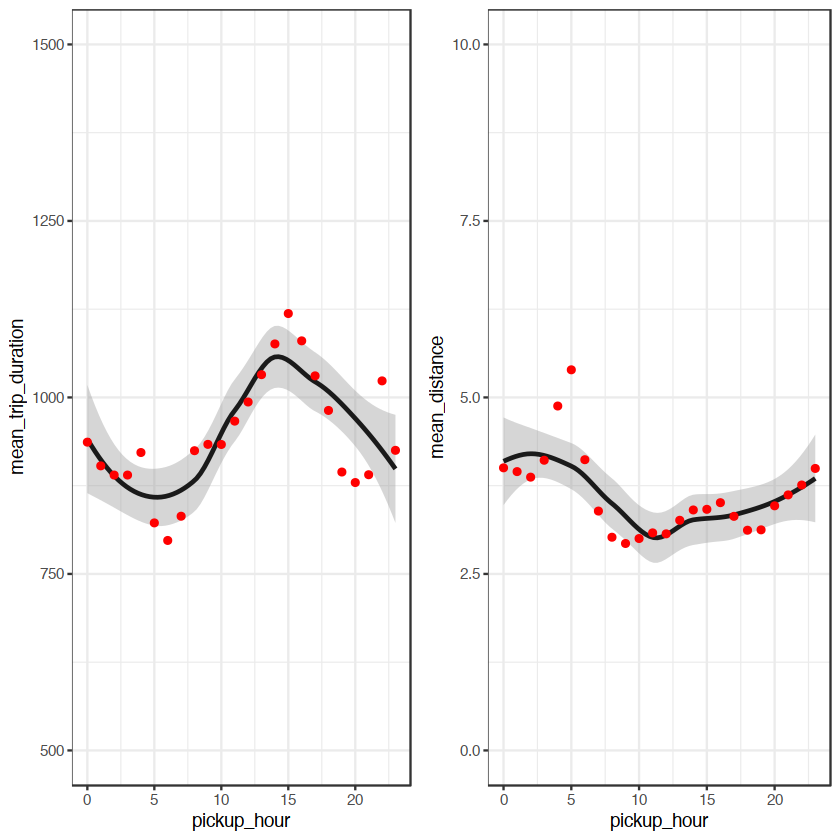

In [13]:
plot1 = train_tidy %>% 
  group_by(pickup_hour) %>% 
  summarize(mean_trip_duration = mean(trip_duration),n()) %>% 
  ggplot(aes(x=pickup_hour,y=mean_trip_duration))+
  geom_smooth(method = 'loess',color="grey10")+
  geom_point(color="red")+coord_cartesian(ylim=c(500,1500))+theme_bw()

plot2 = train_tidy %>% 
  group_by(pickup_hour) %>% 
  summarize(mean_distance = mean(distance_km),n()) %>% 
  ggplot(aes(x=pickup_hour,y=mean_distance))+
  geom_smooth(method = 'loess',color="grey10")+
  geom_point(color="red")+coord_cartesian(ylim=c(0,10))+theme_bw()

grid.arrange(plot1, plot2, ncol =2)

- Besides the possible directions list above: 
    - Comparisons between the two plots. (E.g. the increase in duration syncronize with the decrease in distance/speed)
    - ...

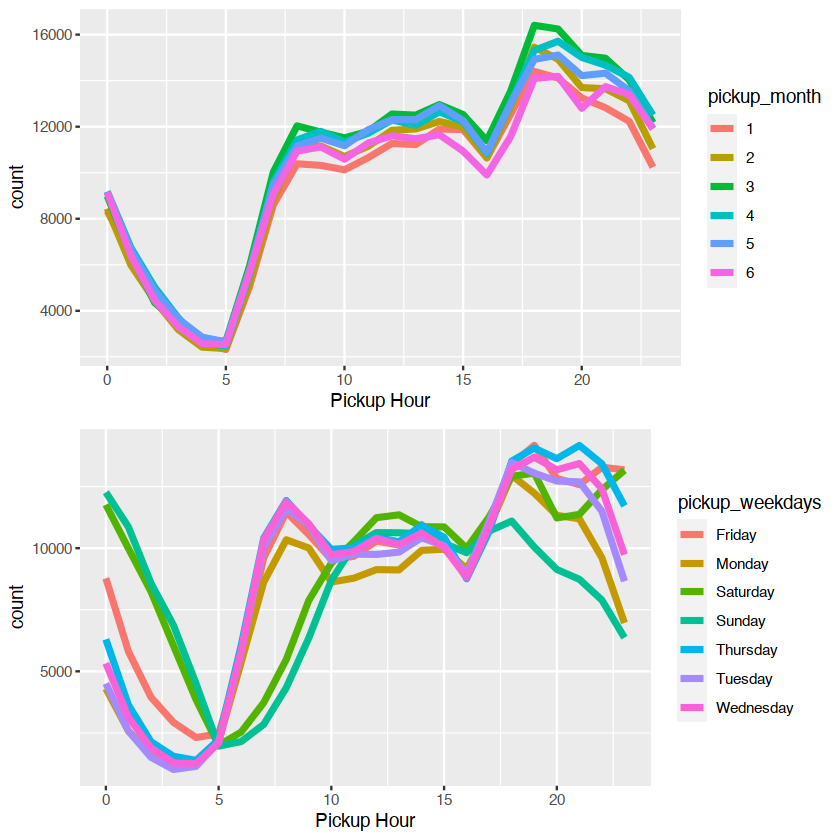

In [14]:
plot1 <- train_tidy %>%
    mutate(pickup_hour = pickup_hour,
        pickup_month = factor(pickup_month)) %>%
  group_by(pickup_hour, pickup_month) %>%
  count() %>%
  ggplot(aes(pickup_hour, n, color = pickup_month)) +
  geom_line(size = 1.5) +
  labs(x = "Pickup Hour", y = "count")

plot2 <- train_tidy %>%
  group_by(pickup_hour, pickup_weekdays) %>%
  count() %>%
  ggplot(aes(pickup_hour, n, color = pickup_weekdays)) +
  geom_line(size = 1.5) +
  labs(x = "Pickup Hour", y = "count")

grid.arrange(plot1, plot2, nrow =2)

- Besides the speed/duration/distance at different hours, taxi company would also like to know how many trips at different hours for different weekdays/months:
    - In general, among different months, the number of trips change with pickup hours in similar pattern.
    - In March, taxi company receives the most orders. In June, they receive the least orders. But in late night of a day in June, there is a evident increase of trips.
    - Among different weekdays, how the number changes in Mon-Fri, and in Sat/Sun with pickup hours?
    - ...
    

In [199]:
## Do a linear regression here (model)

In [200]:
model_lm = lm(distance_km~trip_hour,data = train)
summary(model_lm)



Call:
lm(formula = distance_km ~ trip_hour, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-257.92   -2.18   -1.33    0.43 1238.87 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.370034   0.003604     935   <2e-16 ***
trip_hour   0.280215   0.002437     115   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.282 on 1458642 degrees of freedom
Multiple R-squared:  0.008983,	Adjusted R-squared:  0.008982 
F-statistic: 1.322e+04 on 1 and 1458642 DF,  p-value: < 2.2e-16


In [201]:
pred_lm = predict(model_lm, data = train)
print(mse(pred_lm , train$distance_km))

[1] 18.33542


In [202]:
model_quad = lm(distance_km ~ poly(trip_hour ,2), data = train)
summary(model_quad)


Call:
lm(formula = distance_km ~ poly(trip_hour, 2), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-123.38   -2.12   -1.30    0.41 1238.88 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.445e+00  3.522e-03   977.9   <2e-16 ***
poly(trip_hour, 2)1  4.924e+02  4.254e+00   115.7   <2e-16 ***
poly(trip_hour, 2)2 -5.885e+02  4.254e+00  -138.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.254 on 1458641 degrees of freedom
Multiple R-squared:  0.02182,	Adjusted R-squared:  0.02181 
F-statistic: 1.627e+04 on 2 and 1458641 DF,  p-value: < 2.2e-16


In [203]:
pred_quad = predict(model_quad, data = train)
print(mse(pred_quad , train$distance_km))

[1] 18.09798


- Explain the model and answers to this question
    - which model should you choose? (Discuss mse and its meaning, R square, p-value)
    - The coefficient of trip_hour and their signs.
    - ...

(This is a very standard regression analysis. To be more creative, you could add more independent variables / interaction terms/ change the model form /...)

### 4. Conclusion

In [9]:
# Give an answer to the question, reflect, give some ideas of future work to be done.